In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
###Point 1): Load Wine dataset###
wine = datasets.load_wine()

In [3]:
df_data = pd.DataFrame(data=wine.data,columns=wine.feature_names)
df_target = pd.DataFrame(data=wine.target,columns=['class'])

In [4]:
print(df_data['alcohol'].describe())
print()
print(df_data['malic_acid'].describe())

count    178.000000
mean      13.000618
std        0.811827
min       11.030000
25%       12.362500
50%       13.050000
75%       13.677500
max       14.830000
Name: alcohol, dtype: float64

count    178.000000
mean       2.336348
std        1.117146
min        0.740000
25%        1.602500
50%        1.865000
75%        3.082500
max        5.800000
Name: malic_acid, dtype: float64


Text(0, 0.5, 'malic_acid')

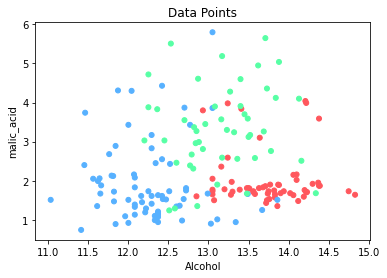

In [5]:
###Point 2): Select the first two attributes for a 2D representation of the image###
colors = ['#ff575d','#57b1ff','#57ffa5']
color_point = []
for y in np.array(df_target):
    color_point.append(colors[y[0]])
plt.scatter(df_data.iloc[:,0],df_data.iloc[:,1],s=25,c=color_point)
plt.title("Data Points")
plt.xlabel("Alcohol")
plt.ylabel("malic_acid")

{0: 59, 1: 71, 2: 48}


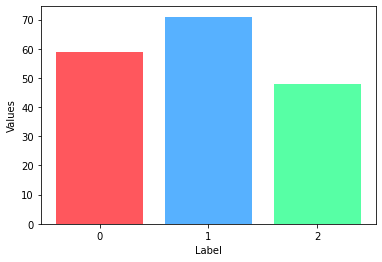

In [6]:
classes = dict()
for y in np.array(df_target):
    if y[0] not in classes:
        classes[y[0]] = 0
    classes[y[0]] = classes[y[0]] + 1
fig, ax = plt.subplots()
plt.bar(classes.keys(),classes.values(),color=colors)
ax.set_ylabel('Values')
ax.set_xlabel('Label')
plt.xticks(np.arange(len(classes.keys())))
print(classes)
#Classes are balanced. This is good

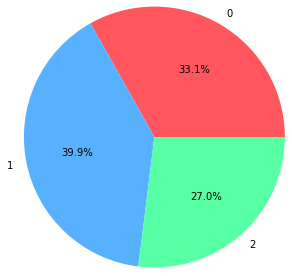

In [7]:
plt.pie(classes.values(),labels=classes.keys(), colors=colors,radius=1.5, autopct='%1.1f%%')
#plt.title ("Classes size")
plt.show()

In [8]:
#Try to preprocess the data but the performances are worse
from sklearn import preprocessing
normalized_X = preprocessing.normalize(df_data,axis=0)
xxx = pd.DataFrame(normalized_X)
xxx.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.074808,0.067656,0.074457,0.073883,0.074201,0.072327,0.067285,0.070899,0.070550,0.068171,0.072916,0.072342,0.069095
std,0.004671,0.032350,0.008632,0.012656,0.010625,0.019723,0.033119,0.024385,0.025382,0.031245,0.017407,0.019666,0.029132
min,0.063469,0.021429,0.042789,0.040172,0.052075,0.030883,0.011273,0.025471,0.018182,0.017251,0.036555,0.035178,0.025718
25%,0.071136,0.046405,0.069533,0.065185,0.065466,0.054912,0.039954,0.052902,0.055433,0.043398,0.059592,0.053668,0.046301
50%,0.075092,0.054007,0.074252,0.073902,0.072905,0.074214,0.070791,0.066617,0.068958,0.063210,0.073491,0.077004,0.062305
75%,0.078703,0.089263,0.080466,0.081482,0.079600,0.088238,0.095327,0.085721,0.086475,0.083561,0.085295,0.087807,0.091122
max,0.085335,0.167956,0.101625,0.113696,0.120516,0.122272,0.168438,0.129316,0.158759,0.175208,0.130227,0.110798,0.155416


In [9]:
###Point 3): Randomly split data into train, validation and test sets in proportion 5:2:3###
train = 0.5
test = 0.3
validation = (1-test-train) / (1-test)

X_train, X_test, y_train, y_test = train_test_split(np.array(df_data.iloc[:,:2]), np.ravel(df_target), test_size=test, random_state=20)

X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=validation, random_state=20)

print(f'train {(len(X_train)/len(df_data)):.3f}, validation {(len(X_val)/len(df_data)):.3f}, test {(len(X_test)/len(df_data)):.3f}')


merged_X_train = np.concatenate([X_train,X_val])
merged_y_train = np.concatenate([y_train,y_val])

print(f'Merged: train {(len(merged_X_train)/len(df_data)):.3f}, test {(len(merged_y_train)/len(df_data)):.3f}')

train 0.494, validation 0.202, test 0.303
Merged: train 0.697, test 0.697


In [10]:
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
def PlotBoundary(clf,X,y,X_v,y_v,meta):
    
    cmap_light = ListedColormap(['#FFAAAA', '#ABE3FF', '#ccffcc'])
    cmap_bold = ListedColormap(['#ff575d','#57b1ff','#57ffa5'])

    #TODO remove
    h = .0005
    offset_x = 0.006/3
    offset_y = 0.006
    
    h = 0.04
    offset_x = 0.3
    offset_y = 0.5
    
    x_min, x_max = X[:, 0].min() - offset_x, X[:, 0].max() + offset_x
    y_min, y_max = X[:, 1].min() - offset_y, X[:, 1].max() + offset_y
    xx, yy = np.meshgrid( np.arange(x_min, x_max, h), np.arange(y_min, y_max, h) )
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    plt.figure()
    ax = plt.subplot(111)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    size = 40
    plt.scatter(X[:, 0], X[:, 1],s=size, c=y, cmap=cmap_bold, label='Train')
    plt.scatter(X_v[:, 0], X_v[:, 1],s=size, c=y_v, cmap=cmap_bold, edgecolors='black', linewidth=0.7, label='Test/Validation')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    legend_elements = [Line2D([0], [0], marker='o', color='w', label='Train', markerfacecolor='#00FF00', markersize=10),
                       Line2D([0], [0], marker='o', color='w', label='Test/Validation', markerfacecolor='#00FF00', markersize=8, markeredgecolor='black', markeredgewidth=1) ]
    
    plt.legend(loc=(1.04,0.8),fontsize=12,handles=legend_elements)
    plt.title(f"{meta}")

    plt.show()

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
def train_model(classifier, X_train, X_test, y_train, y_test, print_all=False,PlotBoundaries=True, meta=''):
    
    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    
    if(print_all):
        print(f"#Accuracy: {accuracy_score(y_test, y_pred):.5f}")
        print(f"#f1 Score: {f1_score(y_test, y_pred, average='weighted'):.5f}")

        print(confusion_matrix(y_test,y_pred))      
        print(classification_report(y_test,y_pred))
        print("#--- --- ---")   
        
    if(PlotBoundaries):
        PlotBoundary(classifier,X_train,y_train,X_test,y_test,meta)
        
    return accuracy_score(y_test, y_pred)

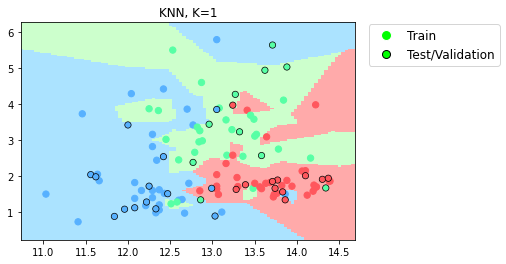

k=1 accuracy=0.77778


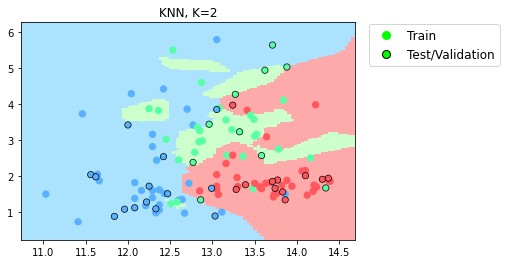

k=2 accuracy=0.80556


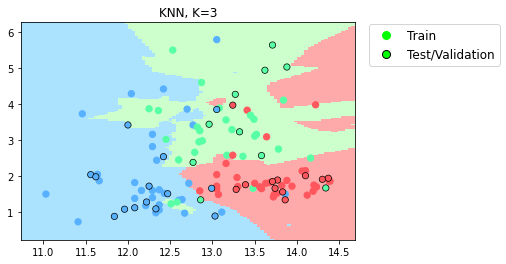

k=3 accuracy=0.83333


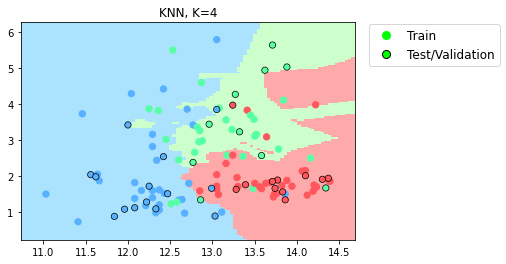

k=4 accuracy=0.83333


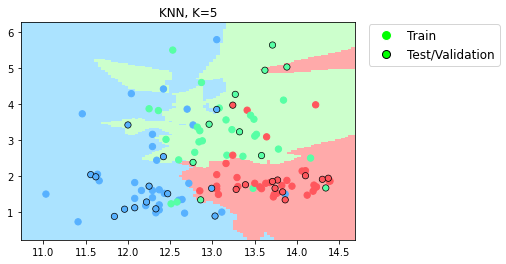

k=5 accuracy=0.72222


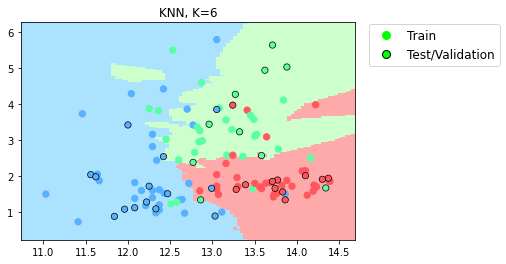

k=6 accuracy=0.80556


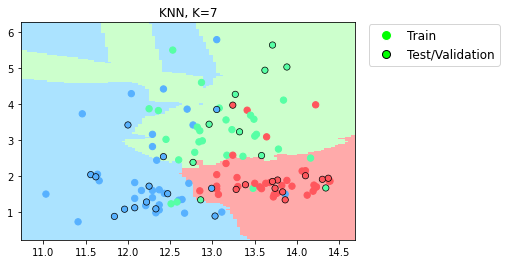

k=7 accuracy=0.80556


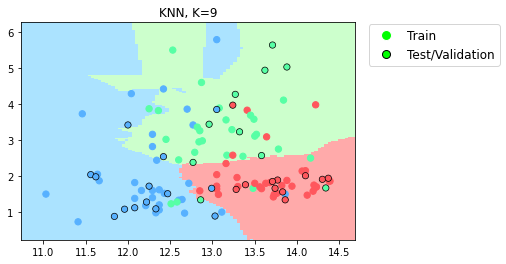

k=9 accuracy=0.83333


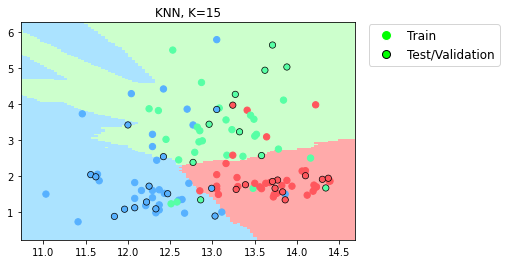

k=15 accuracy=0.80556


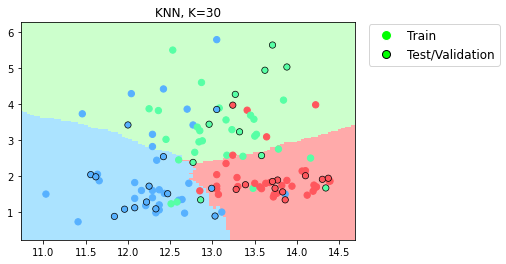

k=30 accuracy=0.80556


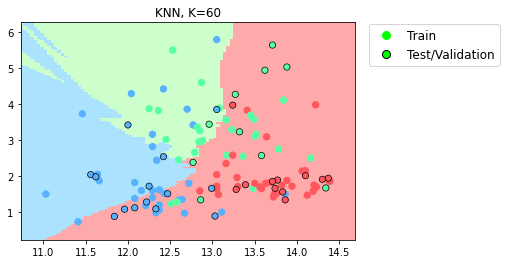

k=60 accuracy=0.47222


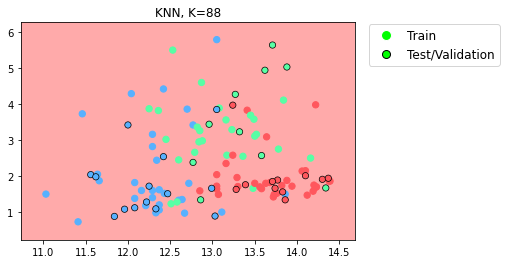

k=88 accuracy=0.33333


In [32]:
###Point 4): Apply K-Nearest Neighbors with k = [1,3,5,7]###
from sklearn.neighbors import KNeighborsClassifier

K = [1,3,5,7]
K_ext = [1,2,3,4,5,6,7,9,15,30,60,88]
accuracy = dict()
for k in K_ext:
    nbr = KNeighborsClassifier(n_neighbors=k)
    
    meta = "KNN, K=" + str(k)
    acc = train_model(nbr, X_train, X_val, y_train, y_val, meta=meta)
    
    accuracy[k] = acc
    print(f'k={k} accuracy={acc:.5f}')

In [46]:
def PlotAccuracy(accuracy, meta):
    fig = plt.figure()
    fig.suptitle('Accuracy Validation Set', fontsize=20)
    plt.xlabel(f'{meta} value', fontsize=18)
    plt.ylabel('Accuracy', fontsize=16)
    plt.plot(list(accuracy.keys()),list(accuracy.values()) )
    plt.scatter(list(accuracy.keys()),list(accuracy.values()),color=(0,0,0,0),s=100,edgecolors='g', linewidth=1)

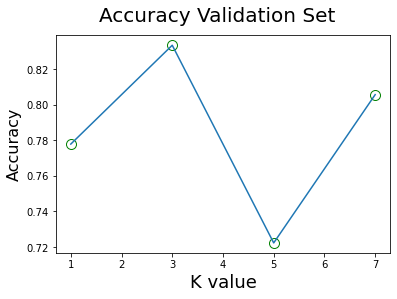

In [14]:
###Point 5): Plot a graph showing how the accuracy on the validation set varies when changing K###
PlotAccuracy(accuracy,'K')

###Point 6): How the boundaries change? Why?###
#The boundaries changes according to the number k: increasing k we accept to mis-classify some points in order to improve the performance, since we look for a higher number of points in the neighbourhood of the data.

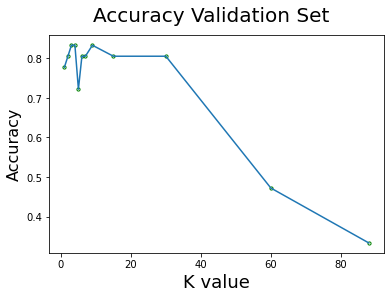

In [47]:
PlotAccuracy(accuracy,'K')

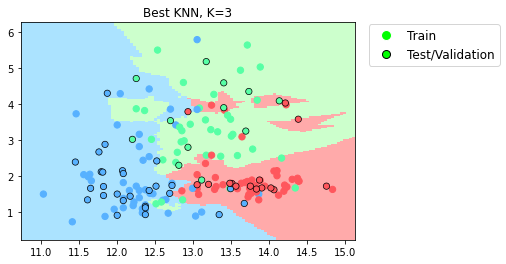

Test with k=3 accuracy=0.85185 (Best Validation=0.83333)


In [15]:
###Point 7): Use the best value of K and evaluate the model on the test set. How well does it works?###
best_k = [key  for (key, value) in accuracy.items() if value == max(accuracy.values())][0]

nbr = KNeighborsClassifier(n_neighbors=best_k)

meta = "Best KNN, K=" + str(best_k)
acc = train_model(nbr, merged_X_train, X_test, merged_y_train, y_test, meta=meta)

print(f'Test with k={best_k} accuracy={acc:.5f} (Best Validation={accuracy[best_k]:.5f})')

#The model works fine and the accuracy on the test set is slightly higher than the validation set.

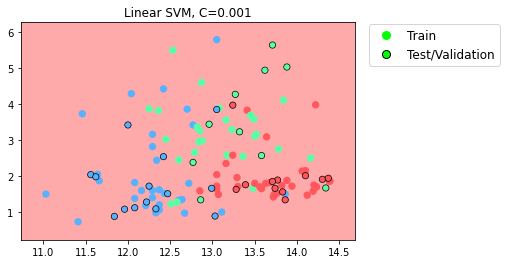

C=0.001 accuracy=0.33333


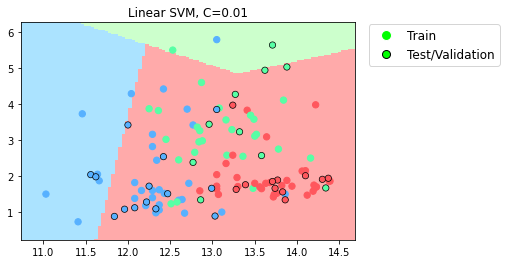

C=0.01 accuracy=0.41667


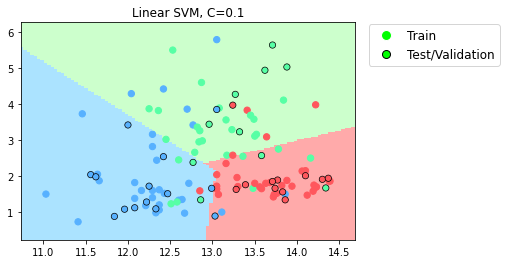

C=0.1 accuracy=0.80556


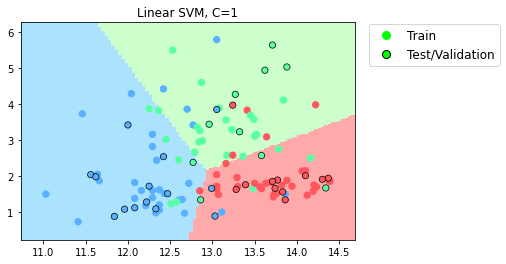

C=1 accuracy=0.77778


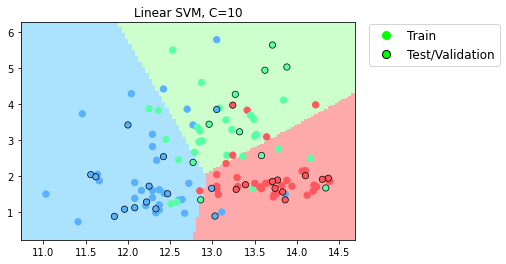

C=10 accuracy=0.77778


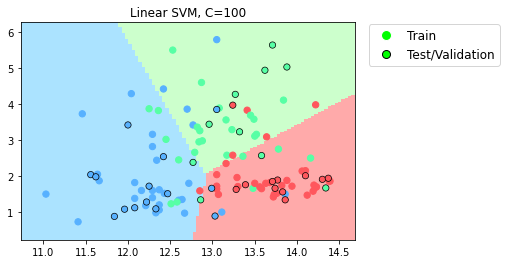

C=100 accuracy=0.77778


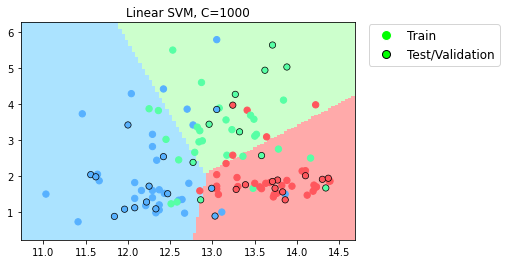

C=1000 accuracy=0.77778


In [16]:
###Point 8): Apply Linear SVM with C = [0.001, 0.01, 0.1, 1, 10, 100,1000]###
from sklearn.svm import SVC

C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
accuracySVM = dict()
for c in C:
    Lsvm = SVC(kernel='linear', C=c, random_state=0, tol=1e-4)
    
    meta = "Linear SVM, C=" + str(c)
    acc = train_model(Lsvm, X_train, X_val, y_train, y_val, meta=meta)
    
    accuracySVM[c] = acc
    print(f'C={c} accuracy={acc:.5f}')

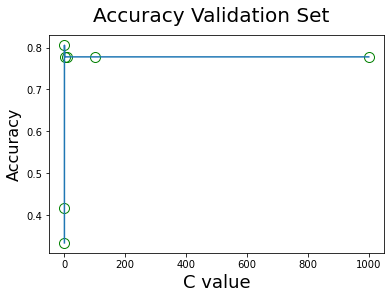

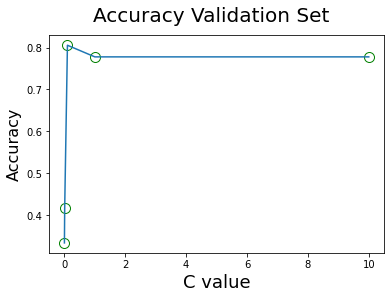

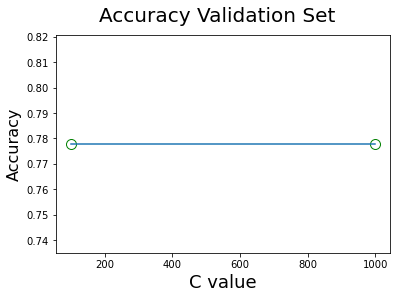

In [17]:
###Point 9): Plot a graph showing how the accuracy on the validation set varies when changing C###

#Not really readable
PlotAccuracy(accuracySVM,'C')

#This should be better (Remove if statement!)
if(True):
    value = 10
    accuracySVM1 = {k:v for (k,v) in accuracySVM.items() if k<=value}
    accuracySVM2 = {k:v for (k,v) in accuracySVM.items() if k>value}
    PlotAccuracy(accuracySVM1,'C')
    PlotAccuracy(accuracySVM2,'C')

###Point 10): How the boundaries change? Why?###
#With a low c the boundaries are very bad.
#They represent better the data with c increasing, since higher c penalize more mis-classified data

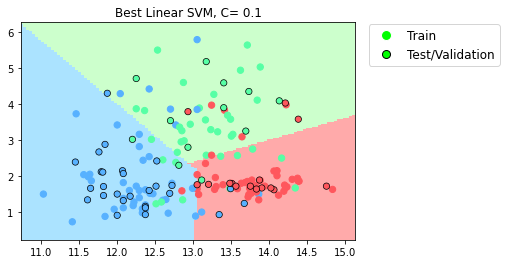

Test with k=0.1 accuracy=0.81481 (Best Validation: 0.80556)


In [18]:
###Point 11): Use the best value of C and evaluate the model on the test set. How well does it works?###
best_c = [key  for (key, value) in accuracySVM.items() if value == max(accuracySVM.values())]

for c in best_c:
    svm = SVC(kernel='linear', C=c, random_state=0, tol=1e-4)
    
    meta = "Best Linear SVM, C= " + str(c)
    acc = train_model(svm, merged_X_train, X_test, merged_y_train, y_test, PlotBoundaries=True, meta=meta)
    
    print(f'Test with k={c} accuracy={acc:.5f} (Best Validation: {accuracySVM[c]:.5f})')

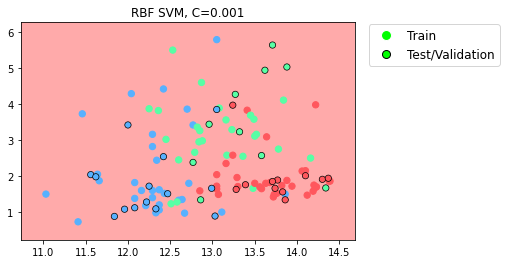

C=0.001 accuracy=0.33333


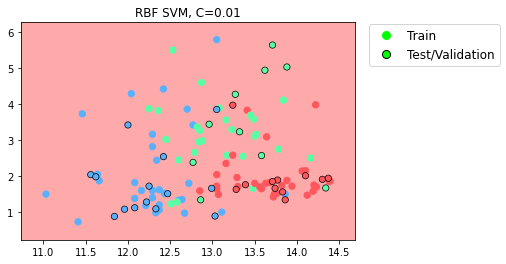

C=0.01 accuracy=0.33333


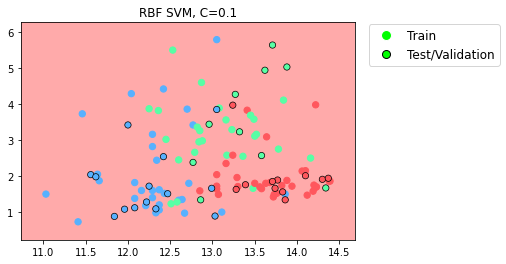

C=0.1 accuracy=0.33333


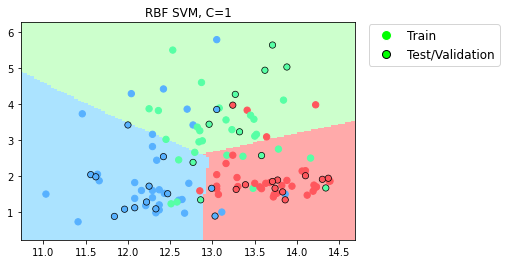

C=1 accuracy=0.77778


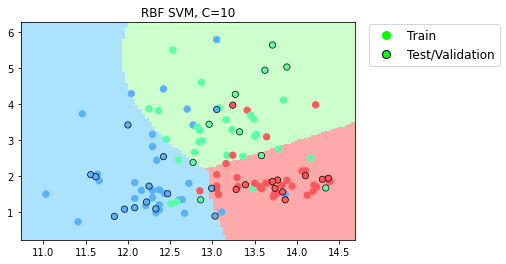

C=10 accuracy=0.80556


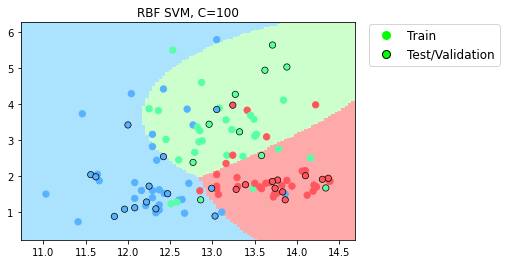

C=100 accuracy=0.80556


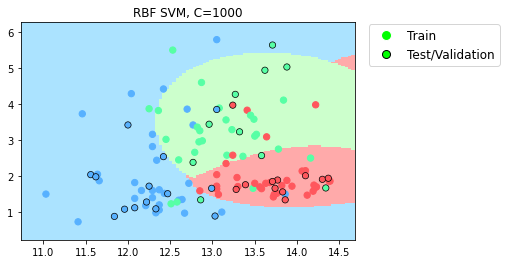

C=1000 accuracy=0.80556


In [19]:
###Point 12): Apply RBF with C = [0.001, 0.01, 0.1, 1, 10, 100,1000]###
from sklearn.svm import SVC

accuracyRBF = dict()
for c in C:
    RBFsvm = SVC(kernel='rbf', C=c, random_state=0, tol=1e-4)
    
    meta = "RBF SVM, C=" + str(c)
    acc = train_model(RBFsvm, X_train, X_val, y_train, y_val, PlotBoundaries=True, meta=meta)    
    
    accuracyRBF[c] = acc
    print(f'C={c} accuracy={acc:.5f}')

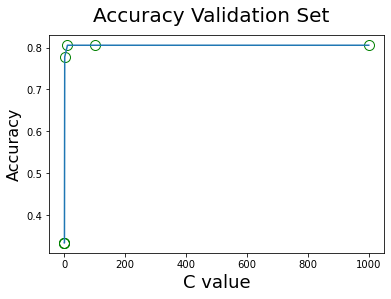

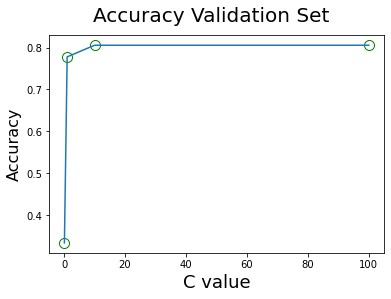

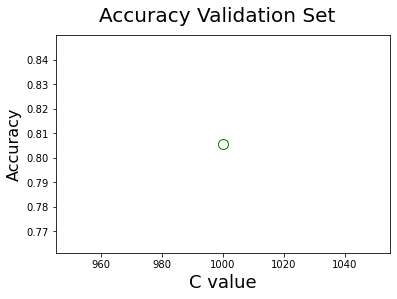

In [20]:
PlotAccuracy(accuracyRBF,'C')

#This should be better (Remove if statement!)
if(True):
    min_value = 0.1
    max_value = 100
    accuracyRBF1 = {k:v for (k,v) in accuracyRBF.items() if k>=min_value and k<=max_value}
    accuracyRBF2 = {k:v for (k,v) in accuracyRBF.items() if k>max_value}
    PlotAccuracy(accuracyRBF1,'C')
    PlotAccuracy(accuracyRBF2,'C')

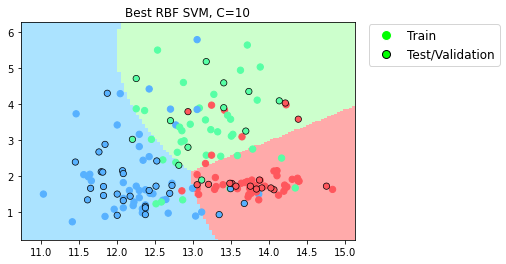

Test with C=10 accuracy=0.83333 (Best Validation: 0.80556)


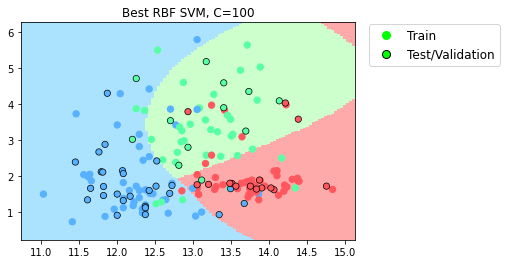

Test with C=100 accuracy=0.83333 (Best Validation: 0.80556)


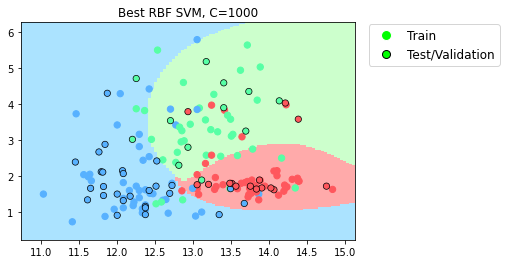

Test with C=1000 accuracy=0.85185 (Best Validation: 0.80556)


In [21]:
###Point 13): Plot a graph showing how the accuracy on the validation set varies when changing C###
best_c = [key  for (key, value) in accuracyRBF.items() if value == max(accuracyRBF.values())]

for c in best_c:
    svm = SVC(kernel='rbf', C=c, random_state=0, tol=1e-4)
    
    meta = "Best RBF SVM, C=" + str(c)
    acc = train_model(svm, merged_X_train, X_test, merged_y_train, y_test, PlotBoundaries=True, meta=meta)    
    
    print(f'Test with C={c} accuracy={acc:.5f} (Best Validation: {accuracyRBF[c]:.5f})')
###Point 14): Are there any differences compared to the linear kernel? How are the boundaries different?###
#With low values of C rbf and linear kernel classifier boundaries are similar.
#Then the boundaries start to be non linear and try to enclose the data points

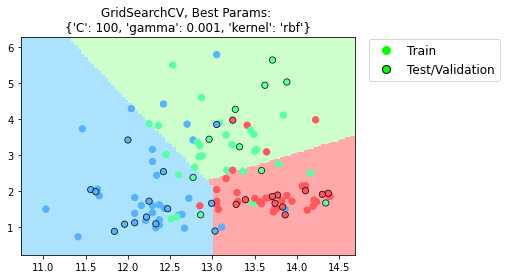

accuracy=0.83333


In [22]:
###Point 15): Perform a grid search of the best parameters for an RBF kernel: we will now tune both gamma and C at the same time.###
from sklearn.model_selection import GridSearchCV

tuned_parameters = {'kernel': ['rbf'], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'C': [0.0001, 0.001, 0.1, 1, 10, 100, 1000, 10000]}
RBFsvc_CV = GridSearchCV(SVC(), tuned_parameters, verbose=0)

acc = train_model(RBFsvc_CV, merged_X_train, X_test, merged_y_train, y_test, PlotBoundaries=False, meta='')

meta = "GridSearchCV, Best Params: \n" + str(RBFsvc_CV.best_params_)
PlotBoundary(RBFsvc_CV,X_train,y_train,X_val,y_val,meta)

print(f'accuracy={acc:.5f}')

In [23]:
###Point 16):  Merge the training and validation split. You should now have 70% training and 30% test data.###

#Already done above
#merged_X_train = np.concatenate([X_train,X_val])
#merged_y_train = np.concatenate([y_train,y_val])

print(f'train {(len(merged_X_train)/len(df_data)):.3f} test {(len(X_test)/len(df_data)):.3f}')

train 0.697 test 0.303


In [24]:
###Point 17): Repeat the grid search for gamma and C but this time perform 5-fold validation.###
from sklearn.model_selection import KFold
k_fold = 5
kf = KFold(n_splits=k_fold)

RBFsvc_CV_kfold = GridSearchCV(SVC(), tuned_parameters, verbose=0)

mean = 0
for train_index, test_index in kf.split(X_train):
    acc = train_model(RBFsvc_CV_kfold, X_train[train_index], X_train[test_index], y_train[train_index], y_train[test_index],PlotBoundaries=False)
    print(f'accuracy={acc:.3f}')
    mean = mean + acc
    
mean = mean/k_fold
print(f'Mean={mean:.3f}')

accuracy=0.611
accuracy=0.667
accuracy=0.833
accuracy=0.941
accuracy=0.647
Mean=0.740


Text(33.0, 0.5, 'C')

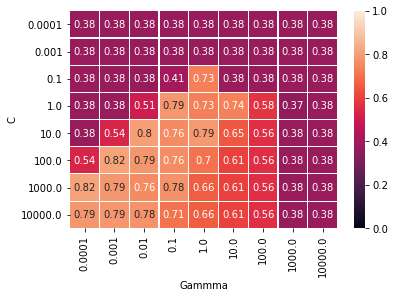

In [25]:
import seaborn as sns
scores = RBFsvc_CV_kfold.cv_results_['mean_test_score'].reshape(len(tuned_parameters['C']),len(tuned_parameters['gamma']))

pd_scores = pd.DataFrame(scores, index=tuned_parameters['C'], columns=tuned_parameters['gamma'])
sns.heatmap(pd_scores, vmin=0, vmax=1, linewidths=.1, annot=True,xticklabels='auto', yticklabels='auto')
plt.xlabel("Gammma")
plt.ylabel("C")

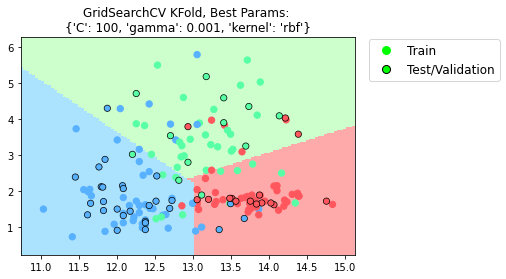

In [26]:
###Point 18): Evaluate the parameters on the test set. Is the final score different? Why?###

meta = "GridSearchCV KFold, Best Params: \n" + str(RBFsvc_CV_kfold.best_params_)
PlotBoundary(RBFsvc_CV_kfold,merged_X_train,merged_y_train,X_test,y_test,meta)

#The score are different and (strangely) they are better wrt the 'validation' set

In [27]:
###Point 19): See report###
###Point 20): See report###